<a href="https://colab.research.google.com/github/balasubramani-bs/fraud-detection/blob/main/PHASE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully.

Accuracy: 1.00
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



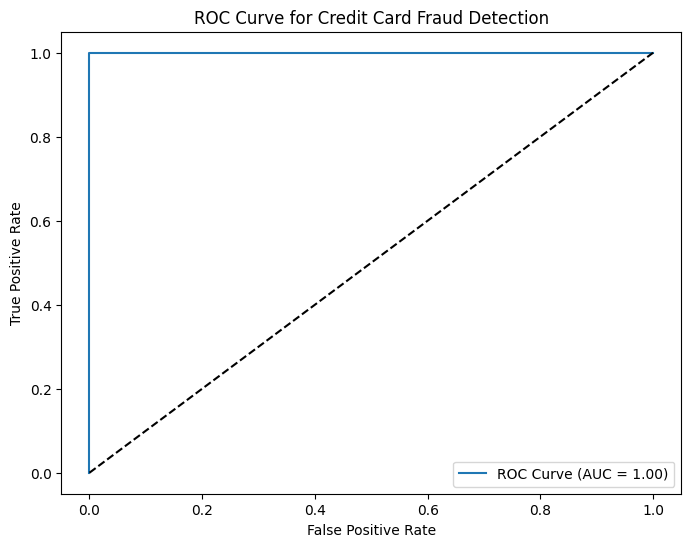

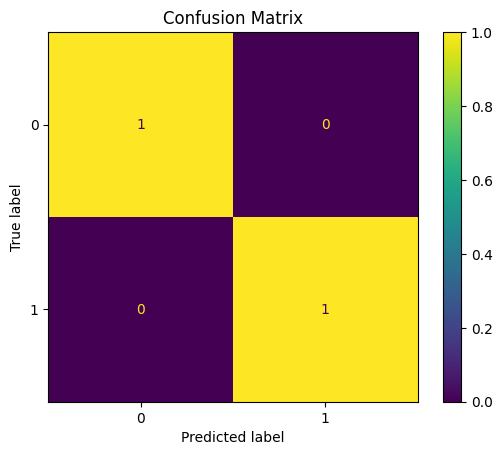

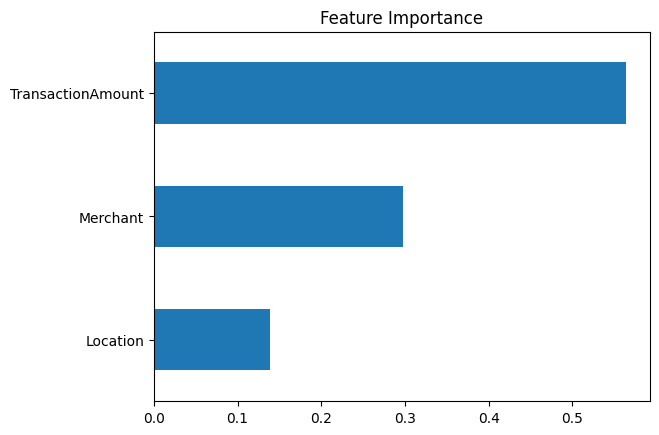

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Sample dataset (you can expand it as needed)
data = {
    'TransactionAmount': [100, 2500, 300, 75, 5600, 180, 4200, 320, 140, 5000],
    'Merchant': ['Amazon', 'Walmart', 'Amazon', 'Target', 'Apple', 'BestBuy', 'Target', 'Amazon', 'Apple', 'Walmart'],
    'Location': ['NY', 'CA', 'TX', 'TX', 'CA', 'NY', 'TX', 'NY', 'CA', 'TX'],
    'IsFraud': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
}

# Load dataset into DataFrame
df = pd.DataFrame(data)
print("Data loaded successfully.")

# Encode categorical columns
le_merchant = LabelEncoder()
df['Merchant'] = le_merchant.fit_transform(df['Merchant'])

le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# Prepare features and target
X = df[['TransactionAmount', 'Merchant', 'Location']].copy()
y = df['IsFraud']

# Scale numerical feature
scaler = StandardScaler()
X['TransactionAmount'] = scaler.fit_transform(X[['TransactionAmount']])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Classification Report:")
print(report)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Card Fraud Detection')
plt.legend()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()
